#Question 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Lab_Data/data_banknote_authentication.txt')
df.columns = ['variance of Wavelet Transformed image','skewness of Wavelet Transformed image','curtosis of Wavelet Transformed image','entropy of image','class']
df

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
def normalize(df):
  #using The min-max feature scaling for normalizating columns individuallly whose data type is integer
  for column in df.columns:
    if df[column].dtype != object:
      df[column] = (df[column] - df[column].min())/(df[column].max()-df[column].min())
  return df

In [ ]:
df = normalize(df)
df

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,0.835659,0.820982,0.121804,0.644326,0.0
1,0.786629,0.416648,0.310608,0.786951,0.0
2,0.757105,0.871699,0.054921,0.450440,0.0
3,0.531578,0.348662,0.424662,0.687362,0.0
4,0.822859,0.877275,0.057100,0.489711,0.0
...,...,...,...,...,...
1366,0.537124,0.565855,0.165249,0.726398,1.0
1367,0.407690,0.332868,0.506753,0.808350,1.0
1368,0.237385,0.011768,0.985603,0.524755,1.0
1369,0.250842,0.201701,0.761587,0.660675,1.0


In [ ]:
X = df.drop('class',axis=1)
y = df['class']

In [ ]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.2)

#Question 2

In [ ]:
def plot_db(svc_model,X_train,y_train):
  plt.figure(figsize=(5, 4))
  sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, s=8);
  
  w = svc_model.coef_[0]           
  b = svc_model.intercept_[0]      
  x_points = np.linspace(-1, 1)    
  y_points = -(w[0] / w[1]) * x_points - b / w[1]  

  plt.plot(x_points, y_points, c='r');

  plt.scatter(svc_model.support_vectors_[:, 0],svc_model.support_vectors_[:, 1], s=50, facecolors='none', edgecolors='k', alpha=.5);

  w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))

  margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))

  decision_boundary_points = np.array(list(zip(x_points, y_points)))
  points_of_line_above = decision_boundary_points + w_hat * margin
  points_of_line_below = decision_boundary_points - w_hat * margin

  plt.plot(points_of_line_above[:, 0], points_of_line_above[:, 1], 'b--', linewidth=2)

  plt.plot(points_of_line_below[:, 0], points_of_line_below[:, 1], 'g--', linewidth=2)


In [ ]:
clf1 = svm.SVC(C=0.03125,kernel = 'linear')
clf1.fit(X_train,y_train)
y_pred1 = clf1.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.6626506024096386


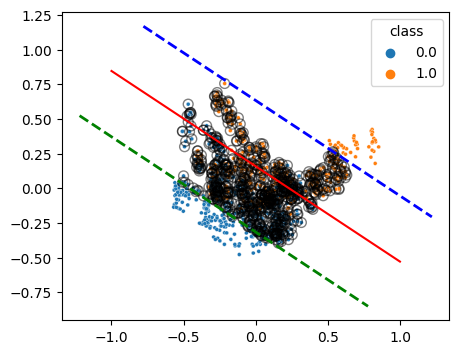

In [ ]:
plot_db(clf1,X_train,y_train)

In [ ]:
clf2 = svm.SVC(C=0.5,kernel = 'linear')
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.7710843373493976


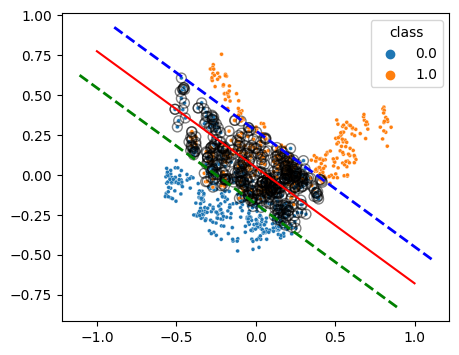

In [ ]:
plot_db(clf2,X_train,y_train)

In [ ]:
clf3 = svm.SVC(C=8,kernel = 'linear')
clf3.fit(X_train,y_train)
y_pred3 = clf3.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.7590361445783133


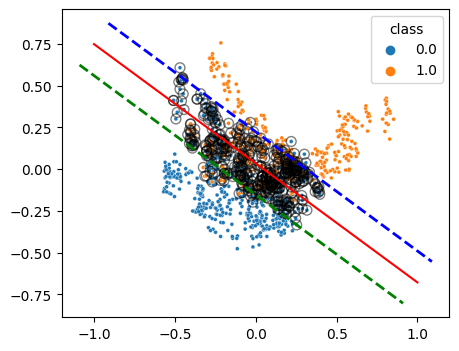

In [ ]:
plot_db(clf3,X_train,y_train)

In [ ]:
clf4 = svm.SVC(C=128,kernel = 'linear')
clf4.fit(X_train,y_train)
y_pred4 = clf4.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.7590361445783133


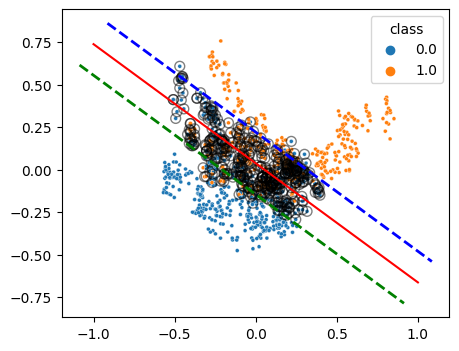

In [ ]:
plot_db(clf4,X_train,y_train)

In [ ]:
clf5 = svm.SVC(C=32768,kernel = 'linear')
clf5.fit(X_train,y_train)
y_pred5 = clf5.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.7590361445783133


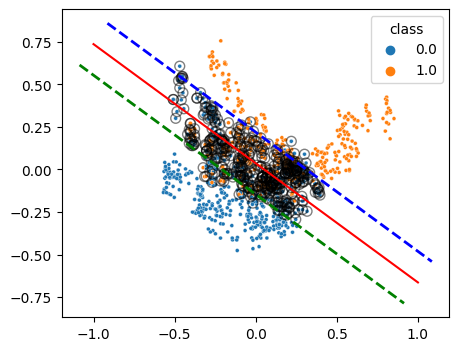

In [ ]:
plot_db(clf5,X_train,y_train)

#Question 3

In [ ]:
def plot_db1(clf,X,Y,cmap = 'Paired_r'):
  h = 0.01
  x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
  y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h

  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
  z = z.reshape(xx.shape)

  plt.figure(figsize = (5,5))
  plt.contourf(xx,yy,z,cmap=cmap,alpha = 0.5)
  plt.contour(xx,yy,z,colors = 'k',linewidths = 0.5)
  plt.scatter(X[:,0],X[:,1],c = Y , cmap = cmap , edgecolors = 'k')

In [ ]:
clf6 = svm.SVC(kernel = 'poly')
clf6.fit(X_train,y_train)
y_pred6 = clf6.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))

Accuracy: 0.6626506024096386


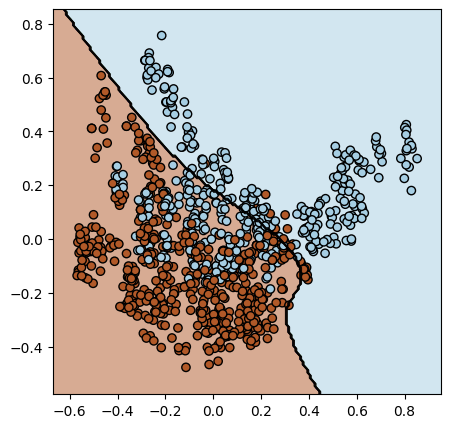

In [ ]:
plot_db1(clf6,X_train,y_train)

In [ ]:
clf7 = svm.SVC(kernel = 'rbf')
clf7.fit(X_train,y_train)
y_pred7 = clf7.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred7))

Accuracy: 0.8674698795180723


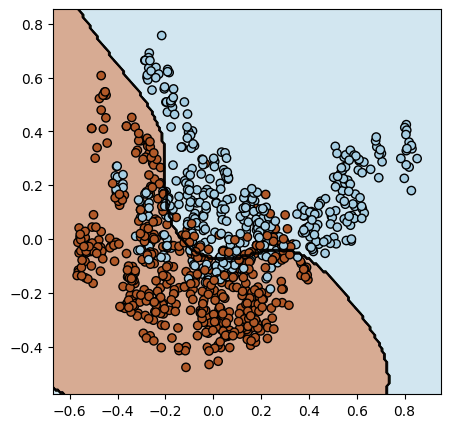

In [ ]:
plot_db1(clf7,X_train,y_train)

In [ ]:
clf8 = svm.SVC(kernel = 'linear')
clf8.fit(X_train,y_train)
y_pred8 = clf8.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred8))

Accuracy: 0.7710843373493976


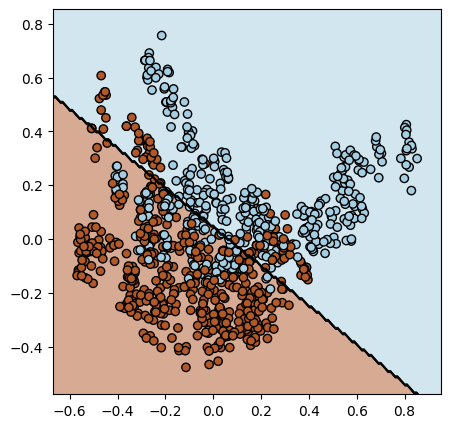

In [ ]:
plot_db1(clf8,X_train,y_train)